In [50]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('data/sentiment_done_3.csv')
df['sentiment'].unique()
df

,score,comms_num,timestamp,post,sentiment
0,0,47,2021-01-28 21:30:35,exit the system the ceo of nasdaq pushed to ha...,bearish
1,0,16,2021-01-28 21:17:10,once youre done with gme $ag and $slv the gent...,bullish
2,560,215,2021-01-28 20:18:32,my brokerage wants to force close my gme calls...,bearish
3,215,90,2021-01-28 20:14:23,rocketship to mars holdbuy until gme marketca...,bullish
4,331,94,2021-01-28 20:12:07,there is an alternative to this system how fuc...,neutral
...,...,...,...,...,...
3002,41,94,2021-07-11 02:46:08,ccl price target lets go cruising carnival cr...,bullish
3003,10,25,2021-08-05 21:41:19,why lumen technologies is the value play alrig...,neutral
3004,0,57,2021-08-05 14:27:33,the hate on $hood is blinding people from maki...,bullish
3005,4829,1537,2021-08-03 17:48:44,unpopular opinion robinhood still has the best...,neutral


In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the date (without the time part)
df['date'] = df['timestamp'].dt.date

text = df.iloc[0]['post']
text

'exit the system the ceo of nasdaq pushed to halt trading to give investors a chance to recalibrate their positions now sec is investigating brokers are disallowing buying more calls this is the institutions flat out admitting they will change the rules to bail out the rich but if it happens to us we get a well shucks you should have known investing is risky have you tried cutting out avocados and coffee maybe doing uber on the side we may have collectively driven up enough sentiment in wall street to make other big players go long on gme with us we do not have the money to move the stock as much as it did alone we didnt hurt wall street as a whole just a few funds went down while others went up and profited off the shorts the same as us the media wants to pin the blame on us it should be crystal clear that this is a rigged game by now its time to build new exchanges that cant arbitrarily change the rules on us cro has some version of these maybe they can be repurposed to be trade stoc

In [53]:
import yfinance as yf

# Fetch GME stock data from YFinance
ticker = 'GME'
start_date = (df['timestamp'].min() - pd.Timedelta(days=16)).date()  # Start 10 days earlier
end_date = df['timestamp'].max().date()
print(f"start date: {start_date}, end date: {end_date}")

start date: 2021-01-12, end date: 2021-08-05


In [54]:
print(f"Fetching stock data for {ticker} from {start_date} to {end_date}...")
gme = yf.download(ticker, start=start_date, end=end_date, interval='1d')  # Hourly stock data
gme.reset_index(inplace=True)

# Extract only the closing price and date
gme = gme[['Date', 'Close']].rename(columns={'Date': 'date', 'Close': 'close'})
gme

[*********************100%***********************]  1 of 1 completed

Fetching stock data for GME from 2021-01-12 to 2021-08-05...


Price,date,close
Ticker,,GME
0,2021-01-12,4.987500
1,2021-01-13,7.850000
2,2021-01-14,9.977500
3,2021-01-15,8.875000
4,2021-01-19,9.840000
...,...,...
137,2021-07-29,41.215000
138,2021-07-30,40.279999
139,2021-08-02,39.412498


In [63]:
# Group by date and sentiment, then count occurrences
sentiment_summary = (
    df.groupby(['date', 'sentiment'])
    .size()
    .unstack(fill_value=0)  # Reshape so sentiments are columns
    .reset_index()
)

sentiment_summary

sentiment,date,bearish,bullish,neutral
0,2021-01-28,20,51,15
1,2021-01-29,185,640,189
2,2021-01-30,35,74,28
3,2021-01-31,22,63,29
4,2021-02-01,14,40,23
...,...,...,...,...
111,2021-06-29,0,0,1
112,2021-07-11,0,1,2
113,2021-07-16,0,1,0
114,2021-08-03,1,0,1


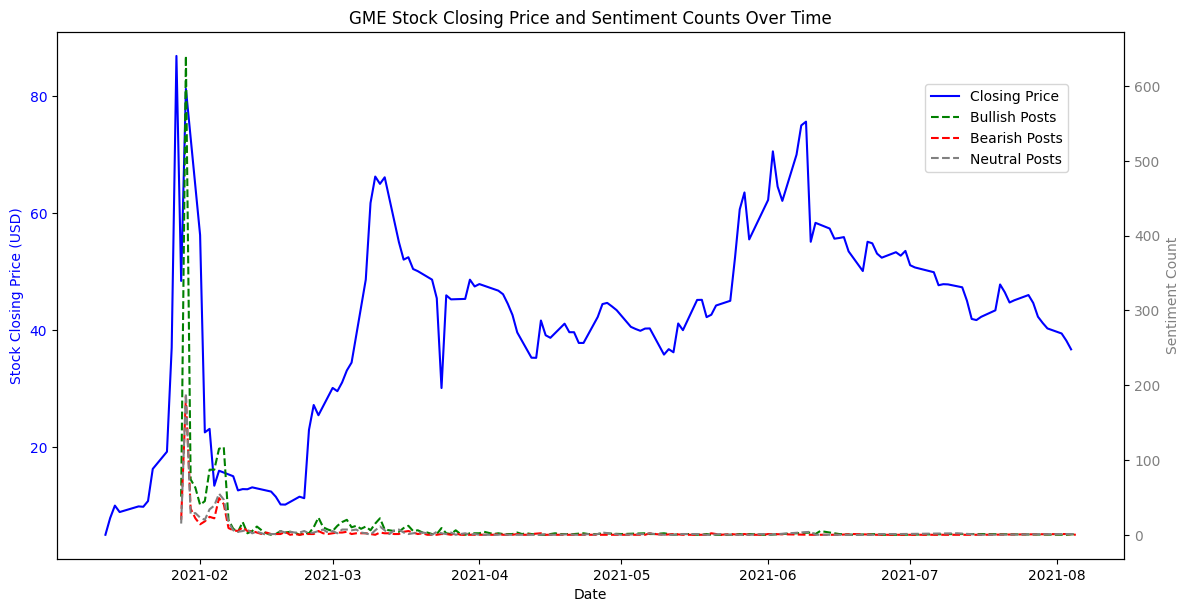

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
gme['date'] = pd.to_datetime(gme['date'])
sentiment_summary['date'] = pd.to_datetime(sentiment_summary['date'])

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))  # Initialize a figure and axis

# Plot stock closing price on primary y-axis
ax1.plot(gme['date'], gme['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment counts on secondary y-axis
ax2 = ax1.twinx()  # Create a twin axis for sentiment
ax2.plot(sentiment_summary['date'], sentiment_summary['bullish'], color='green', linestyle='--', label='Bullish Posts')
ax2.plot(sentiment_summary['date'], sentiment_summary['bearish'], color='red', linestyle='--', label='Bearish Posts')
ax2.plot(sentiment_summary['date'], sentiment_summary['neutral'], color='gray', linestyle='--', label='Neutral Posts')
ax2.set_ylabel('Sentiment Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Title and display
plt.title("GME Stock Closing Price and Sentiment Counts Over Time")
plt.savefig('vis.png')
plt.show()

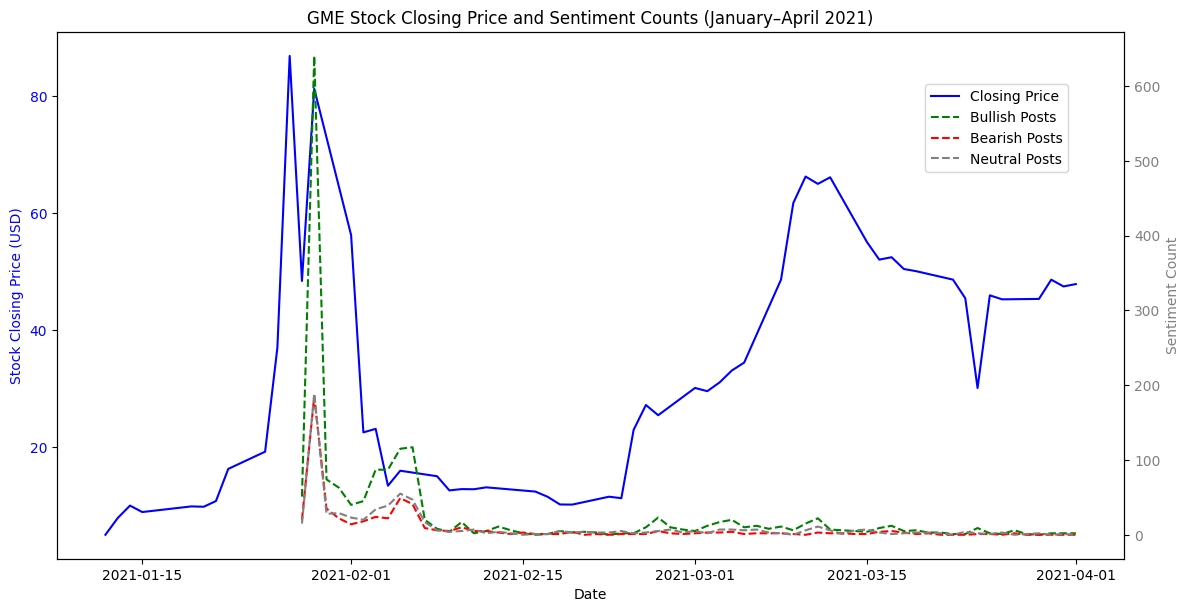

In [17]:
# Filter data for January 2021 to April 2021
start_date = '2021-01-01'
end_date = '2021-04-01'
gme_filtered = gme[(gme['date'] >= start_date) & (gme['date'] <= end_date)]
sentiment_filtered = sentiment_summary[
    (sentiment_summary['date'] >= start_date) & (sentiment_summary['date'] <= end_date)
]

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))  # Initialize a figure and axis

# Plot stock closing price on primary y-axis
ax1.plot(gme_filtered['date'], gme_filtered['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment counts on secondary y-axis
ax2 = ax1.twinx()  # Create a twin axis for sentiment
ax2.plot(sentiment_filtered['date'], sentiment_filtered['bullish'], color='green', linestyle='--', label='Bullish Posts')
ax2.plot(sentiment_filtered['date'], sentiment_filtered['bearish'], color='red', linestyle='--', label='Bearish Posts')
ax2.plot(sentiment_filtered['date'], sentiment_filtered['neutral'], color='gray', linestyle='--', label='Neutral Posts')
ax2.set_ylabel('Sentiment Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Title and display
plt.title("GME Stock Closing Price and Sentiment Counts (January–April 2021)")
plt.savefig('vis2.png')
plt.show()

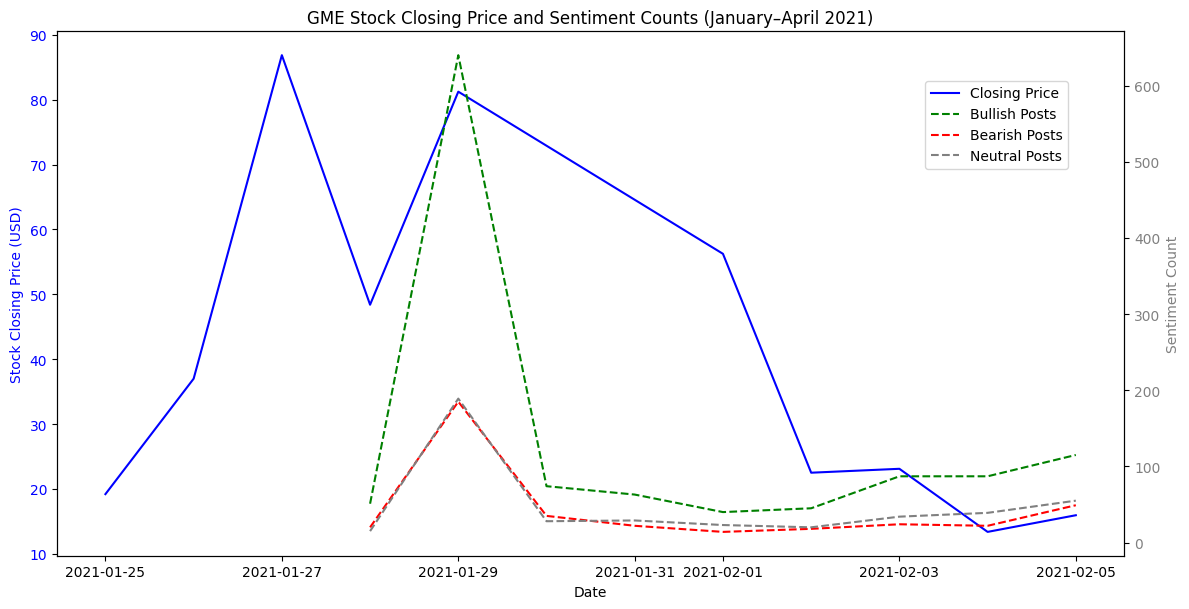

In [66]:
# Filter data for January 2021 to April 2021
start_date = '2021-01-25'
end_date = '2021-02-5'
gme_filtered = gme[(gme['date'] >= start_date) & (gme['date'] <= end_date)]
sentiment_filtered = sentiment_summary[
    (sentiment_summary['date'] >= start_date) & (sentiment_summary['date'] <= end_date)
]

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))  # Initialize a figure and axis

# Plot stock closing price on primary y-axis
ax1.plot(gme_filtered['date'], gme_filtered['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
"""
# Add horizontal lines for specific price levels
ax1.axhline(y=10, color='grey', linestyle='--', linewidth=1, )  # Example threshold
ax1.axhline(y=20, color='grey', linestyle='--', linewidth=1, )  # Example threshold
ax1.axhline(y=30, color='grey', linestyle='--', linewidth=1, )  # Example threshold
ax1.axhline(y=40, color='grey', linestyle='--', linewidth=1, )  # Example threshold
ax1.axhline(y=50, color='grey', linestyle='--', linewidth=1, )  # Example threshold
"""

# Plot sentiment counts on secondary y-axis
ax2 = ax1.twinx()  # Create a twin axis for sentiment
ax2.plot(sentiment_filtered['date'], sentiment_filtered['bullish'], color='green', linestyle='--', label='Bullish Posts')
ax2.plot(sentiment_filtered['date'], sentiment_filtered['bearish'], color='red', linestyle='--', label='Bearish Posts')
ax2.plot(sentiment_filtered['date'], sentiment_filtered['neutral'], color='gray', linestyle='--', label='Neutral Posts')
ax2.set_ylabel('Sentiment Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Title and display
plt.title("GME Stock Closing Price and Sentiment Counts (January–April 2021)")
plt.savefig('vis3.png')
plt.show()

In [75]:
bulls = df.query("sentiment == 'bullish'").sample(n=3, random_state=42)
bears = df.query("sentiment == 'bearish'").sample(n=3, random_state=42)
neut = df.query("sentiment == 'neutral'").sample(n=3, random_state=42)

sample = pd.concat([bulls, bears, neut], axis=0, ignore_index=True)
sample


,score,comms_num,timestamp,post,sentiment,date
0,1,0,2021-01-29 02:29:23,still able to buy gme on etrade im still able ...,bullish,2021-01-29
1,1,1,2021-01-29 02:23:56,100 of stream proceeds go to gme doing my part...,bullish,2021-01-29
2,59,32,2021-03-13 07:28:11,why just purchasing $800 calls isnt enough for...,bullish,2021-03-13
3,550,222,2021-02-09 07:25:44,how to buy gme shares for 25 off the most reta...,bearish,2021-02-09
4,0,44,2021-02-04 14:07:06,im sad why does everyone here seem to hate sil...,bearish,2021-02-04
5,35,7,2021-01-29 04:30:01,so the order book is worthless watching this h...,bearish,2021-01-29
6,10,7,2021-02-07 16:41:44,why in long on mnkd credit to uyoyo_mas_cousin...,neutral,2021-02-07
7,9,5,2021-01-29 03:25:05,anyone know how long revolut application verif...,neutral,2021-01-29
8,28,2,2021-01-29 01:34:06,please not the time for panic listen retards ...,neutral,2021-01-29


In [ ]:
ids = ['l71eg7', 'l718j8', 'm3rmfv', 'lfmawv', 'lc73c9', 'l74jfp', 'lehaem', 'l731cm', 'l6zuwg']
sent = ['bullish','bullish','bullish','bearish','bearish','bearish','neutral','neutral','neutral']
reddit = pd.read_csv('data/reddit_wsb.csv')
r = reddit[reddit['id'].isin(ids)]
r['sentiment'] = 'a'
i = 0
for index, row in r.iterrows():
    #print(row['sentiment'])
    r.loc[index, 'sentiment'] = sent[i]
    i+=1
#print(r.iloc[2]['body'])

In [108]:
print(r.iloc[7]['body'])


So, I am way to fond of my wife's boyfriend to do this...

But I am SO tempted to buy 1000 GME shares at $60, and then sell 10 covered calls for Feb 26th with a $60 strike price and $15 premium.

And then roll the fucking options premium back into more shares, and then sell more covered calls. 

Yes, this is a retarded play, don't do this, this is not advice. It is just a commentary on how messed up the options are in GME right now.

Yes, I know this will result in the MM selling synthetic longs on the market, thereby driving the price down... 

Which is the craziest point! Because there are more shares now, the calls go down in value! 

So you buy them back, and do the whole thing again! 

..... 

Look, I know this is stupid, and I know it won't really work. But I thought I would share some legit retarded idea, that only exists because of monkey business in the market.
